In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import train, RNN

# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [50]:
sd_dataset = SingleDecisionDataset(32000)
train_dataloader = DataLoader(sd_dataset, batch_size=32)

model = RNN()
train(train_dataloader, model, device)

loss: 1.002140  [   32/32000]
loss: 0.916660  [ 3232/32000]
loss: 0.000388  [ 6432/32000]
loss: 0.000853  [ 9632/32000]
loss: 0.000246  [12832/32000]
loss: 0.000220  [16032/32000]
loss: 0.000266  [19232/32000]
loss: 0.000242  [22432/32000]
loss: 0.000217  [25632/32000]
loss: 0.000078  [28832/32000]


### Network output given input set

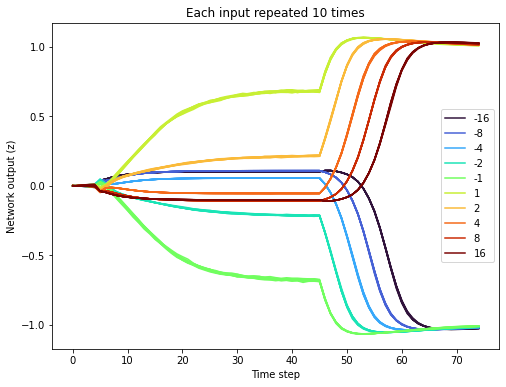

0

In [43]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def plot_input_range(model, f_in_vec, in_params, 
                     num_repeat=10,
                     alpha=0,
                     figsize=(8,6)):
    
    if alpha==0:
        alpha = 1/num_repeat
    
    cmap = plt.cm.get_cmap('turbo', len(in_params))
    tmp_u, tmp_y = f_in_vec(in_params[0])
 
    plt.figure(figsize=figsize)
    plt.xlabel("Time step")
    plt.ylabel("Network output (z)")
    plt.title("Each input repeated {} times".format(num_repeat))

    for idx, par in enumerate(in_params):
        
        data = np.zeros((num_repeat, tmp_u.shape[0]))
        
        for i in range(num_repeat):
            data[i], y = f_in_vec(par)
            
        data = torch.Tensor(data)
            
        z = model(data).detach().numpy()
        plt.plot(z[0].T, c=cmap(idx), label=str(par), alpha=alpha)
        if num_repeat > 1:
            plt.plot(z[1:].T, c=cmap(idx), alpha=alpha)
    
    plt.legend()
    plt.show()
    
    return 0

plot_input_range(model, 
                single_decision, 
#                  [-16, -8])
                [-16, -8, -4, -2, -1, 1, 2, 4, 8, 16],
                alpha=1,
                num_repeat=10)

# plot_input_range(model, 
#                  parametric,
#                  [(10, 14), (10,22), (10,30), (10,34)])

### Neuron values given single input

torch.Size([75])


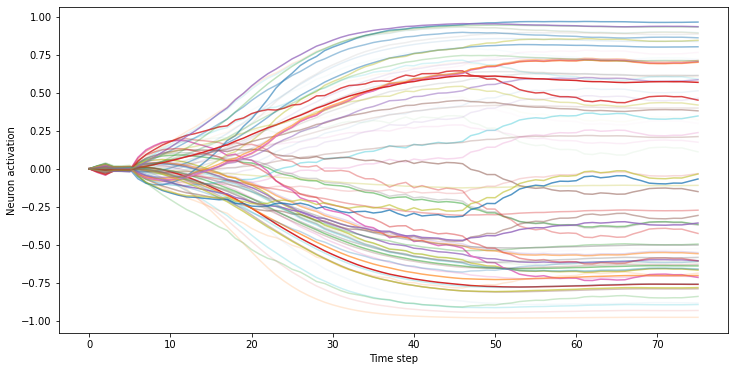

In [86]:
def plot_neuron_states(model, u, y,
                       figsize=(8, 6),
                      alpha=0.5,
                      apply_activation=False):
        
    plt.figure(figsize=figsize)
    plt.xlabel("Time step")
    plt.ylabel("Neuron value")
    if apply_activation:
        plt.ylabel("Neuron activation")
    plt.title("")
    
    z, activity = model(u, visible_activity=True) 
    if apply_activation:
        activity = model.activation(activity)
    activity = activity.detach().numpy()
    activity = activity.squeeze()
    w = model.w.detach().numpy().squeeze()
    max_abs_w = np.abs(w).max()
    w /= max_abs_w
    
    print(u.shape)
    
    for i in range(u.size(0)):
        
        
        plt.plot(activity.T[i], alpha=abs(w[i]))
    
    
u, y = single_decision(4*3.2/100)
u, y = torch.tensor(u, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plot_neuron_states(model, u, y, figsize=(12, 6), apply_activation=True)

### Network dynamics in m-I plane

In [76]:
def plot_network_in_m_i(model, f_in_vec, in_params, num_repeat=10):
    
    cmap = plt.cm.get_cmap('turbo', model.network_size)

    plt.figure(figsize=figsize)
    plt.xlabel("m component")
    plt.ylabel("I component")
    
    wi = model.wi.detach().numpy()
    m = model.m.detach().numpy()
    
    f
    
    
    for idx, par in enumerate(in_params)
    
    
    return 0


plot_network_in_m_i(model, single_decision, )
    